In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Applications/anaconda3/lib/python3.8/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("../Homework Machine Learning/Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
                        'koi_fpflag_co', 'koi_fpflag_ec','koi_period',
                       'koi_time0bk','koi_impact','koi_duration','koi_depth',
                        'koi_prad','koi_teq','koi_insol','koi_model_snr',
                       'koi_tce_plnt_num','koi_steff','koi_slogg','koi_srad',
                       'ra','dec','koi_kepmag']]
selected_features.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,...,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
X = selected_features.drop("koi_disposition", axis=1)
y = selected_features["koi_disposition"]
print(X.shape, y.shape)

(6991, 20) (6991,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,1,5737,4.327,1.125,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,1,5855,4.578,0.797,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,1,6328,4.481,0.963,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,1,4768,4.536,0.779,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Train the Model



### Model: KNN(without err columns)

k: 1, Train/Test Score: 1.000/0.767
k: 3, Train/Test Score: 0.885/0.785
k: 5, Train/Test Score: 0.859/0.787
k: 7, Train/Test Score: 0.843/0.793
k: 9, Train/Test Score: 0.840/0.791
k: 11, Train/Test Score: 0.840/0.796
k: 13, Train/Test Score: 0.836/0.801
k: 15, Train/Test Score: 0.829/0.805
k: 17, Train/Test Score: 0.827/0.800
k: 19, Train/Test Score: 0.825/0.795


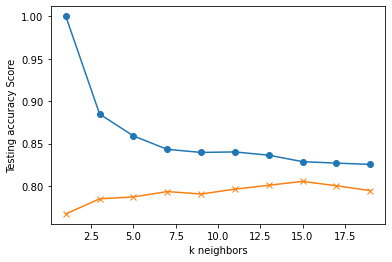

In [10]:
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
# Create the GridSearchCV model
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]}

In [12]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')

In [13]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('knn',
                                        KNeighborsClassifier(n_neighbors=19))]),
             param_grid={'knn__n_neighbors': [2, 5, 15, 30, 45, 64]},
             scoring='accuracy')

In [14]:
print(grid.best_params_)
print(grid.best_score_)

{'knn__n_neighbors': 64}
0.6328447837150127


# Save the Model

In [15]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Parastoo_KNN_without_error.sav'
joblib.dump(pipe, filename)

['Parastoo_KNN_without_error.sav']